The effect of a 1 standard deviation increase in a feature on the log-odds of being in a higher ripeness class.

C:\Users\uqkmuroi\AppData\Local\Temp\ipykernel_14440\3135989273.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(top), palette='coolwarm')


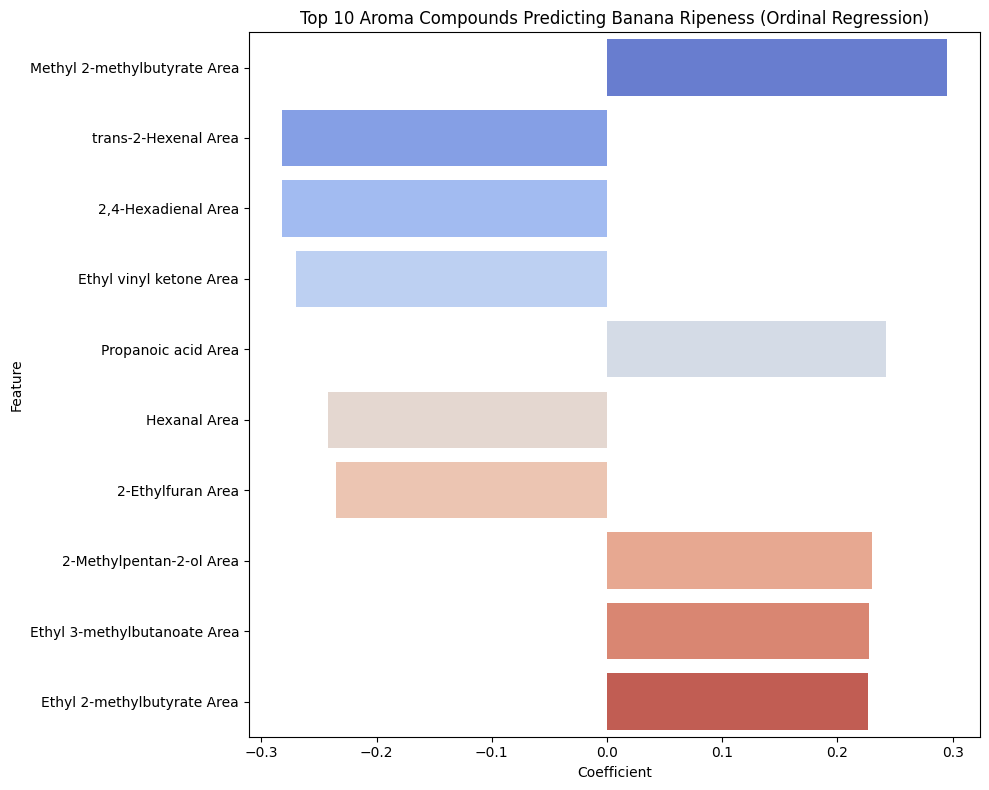

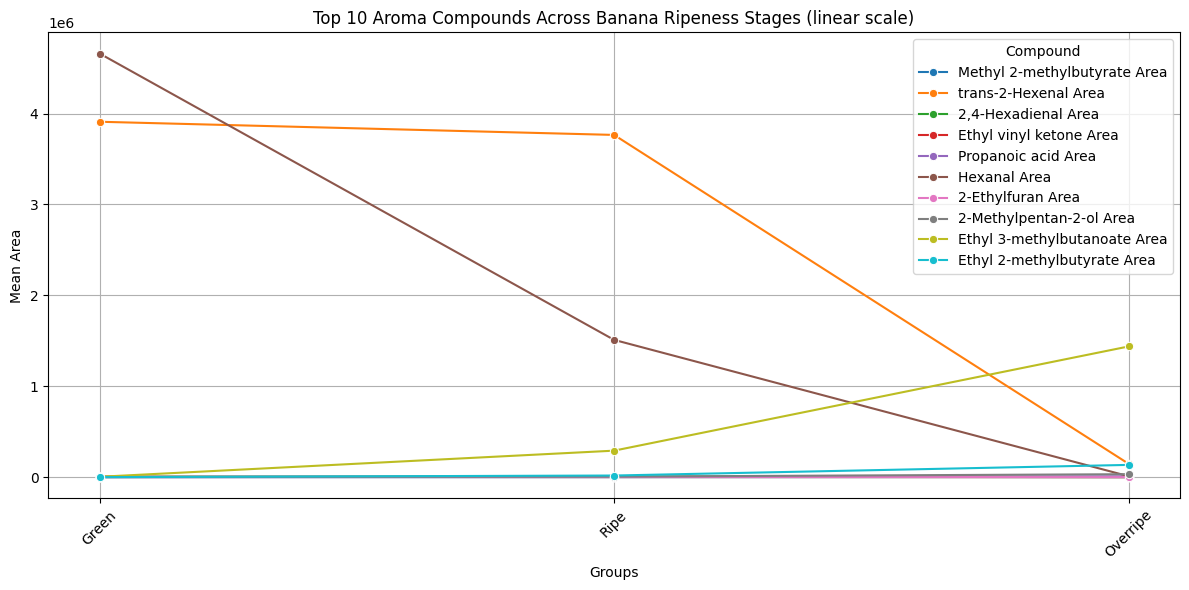

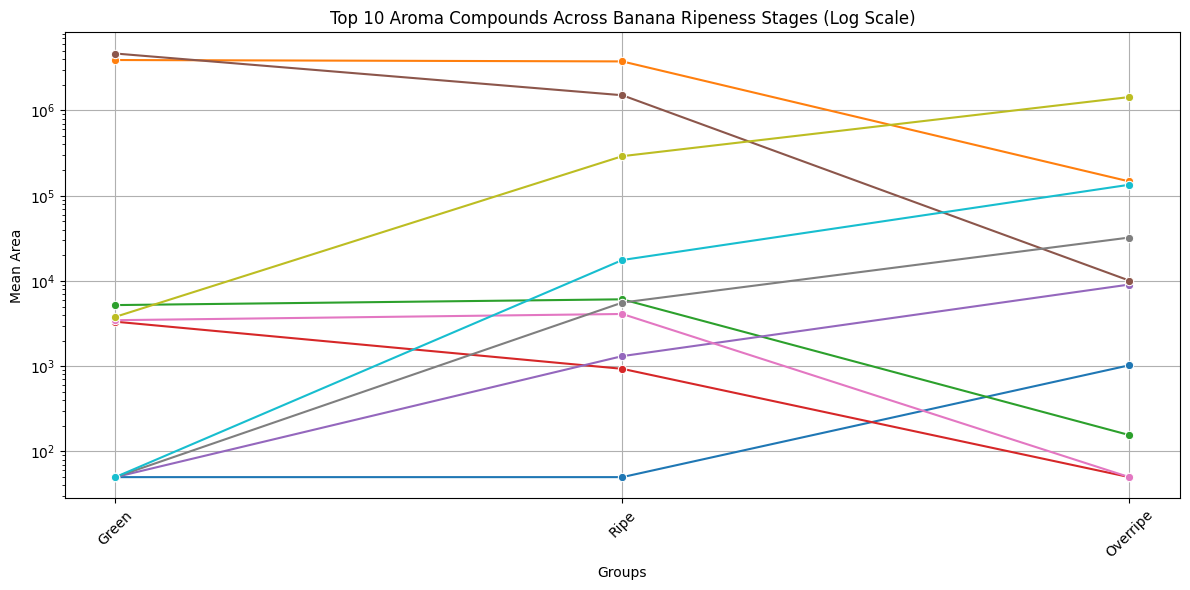

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from mord import LogisticAT  # Ordinal regression model


# parameter: this can be adjusted to show the number of top values to display in figures
top = 10


# Load the dataset
df = pd.read_csv("badata_imputed_filled.csv")

# Drop the first unnamed column as it's an index
df = df.drop(columns=[df.columns[0]])

# Separate features and target
target = df['Groups']
features = df.drop(columns=['Groups'])

# Encode the target as ordinal: Green < Ripe < Overripe
ordinal_map = {'Green': 0, 'Ripe': 1, 'Overripe': 2}
y = target.map(ordinal_map).values

#log features
X_log = np.log(features)

# scale values
scaler = MinMaxScaler()
X = scaler.fit_transform(X_log)

# Fit ordinal regression model
model = LogisticAT()
model.fit(X, y)

# Get feature coefficients
coefficients = model.coef_
feature_names = features.columns
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
}).sort_values(by='Abs_Coefficient', ascending=False)

# Plot top contributing features
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(top), palette='coolwarm')
plt.title(f'Top {top} Aroma Compounds Predicting Banana Ripeness (Ordinal Regression)')
plt.tight_layout()
#plt.savefig("ordinal_top_features.png")
plt.show()



# Select top contributing features
top_features = coef_df.head(top)['Feature'].values

# Calculate mean values of top features grouped by ripeness
grouped_means = df.groupby('Groups')[top_features].mean().reset_index()

# Melt the dataframe for plotting
melted_df = grouped_means.melt(id_vars='Groups', var_name='Compound', value_name='Mean Area')
# Ensure Groups are in the correct ordinal order
melted_df['Groups'] = pd.Categorical(melted_df['Groups'], categories=['Green', 'Ripe', 'Overripe'], ordered=True)

# Plot lineplot showing how compound levels change across ripeness stages
plt.figure(figsize=(12, 6))
sns.lineplot(data=melted_df, x='Groups', y='Mean Area', hue='Compound', marker='o')
plt.title(f'Top {top} Aroma Compounds Across Banana Ripeness Stages (linear scale)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
#plt.savefig("top_compounds_lineplot.png")
plt.show()

# 2nd plot with log scale as data is compressed at bottom
plt.figure(figsize=(12, 6))
sns.lineplot(data=melted_df, x='Groups', y='Mean Area', hue='Compound', marker='o')
plt.yscale('log')
plt.title(f'Top {top} Aroma Compounds Across Banana Ripeness Stages (Log Scale)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend([],[], frameon=False)  # removes the legend
plt.tight_layout()
#plt.savefig("top_compounds_lineplot(log).png")
plt.show()